So, we have a list of tweets using a particular hashtag. We need to use time and follower relationships

In [1]:
import preprocessing, os, gzip
from config import FOLLOWER_DATA_DIR
from config import TWITTER_DATA_DIR
import graph_tool.all as gt
from tqdm import tqdm
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib
import os, pickle

## Debugging Script

In [3]:
ls -l ../data/twitter-coordination-src/data

total 10616876
-rw-rw-r-- 1 jschless jschless  925574075 Jul 31 11:34 campaign_tweets_new.pkl
-rw----r-- 1 garimell garimell  923728814 Jul 23 10:45 campaign_tweets.pkl
-rw-rw-r-- 1 jschless jschless 2356476069 Sep 23 07:26 cascade_root_embeddings.pkl
-rw-rw-r-- 1 jschless jschless   16668330 Sep 23 16:53 cascade_root_ids_2.pkl
-rw-rw-r-- 1 jschless jschless   16668330 Sep 21 14:59 cascade_root_ids.pkl
-rw----r-- 1 garimell garimell   27587415 Jul 23 10:45 case_tweets.pkl
-rw-rw-r-- 1 jschless jschless    6136818 Sep 26 06:46 clustering_labels_epsilon_0_pca_70.pkl
-rw-rw-r-- 1 jschless jschless    6136818 Sep 25 04:56 clustering_labels_epsilon_25_pca_70.pkl
-rw-rw-r-- 1 jschless jschless   12006462 Nov  7 11:55 exposure_results.pkl
-rw----r-- 1 garimell garimell      20374 Jul 23 10:45 hashtags.csv
drwx---rwx 2 garimell garimell        224 Jul 23 10:45 missing_data/
-rw----r-- 1 garimell garimell      10788 Jul 23 10:45 name_changes.pkl
-rw----r-- 1 garimell garimell   10842033 Jul 23 

In [2]:
with open(os.path.join(TWITTER_DATA_DIR, 'exposure_results.pkl'), 'rb') as f:
    results = pickle.load(f)

<ipython-input-6-b8ad9c4c6d61>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


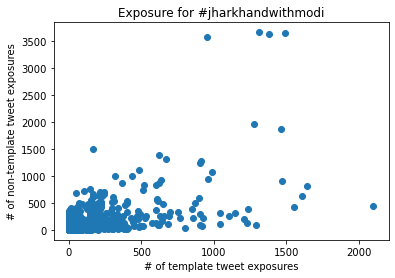

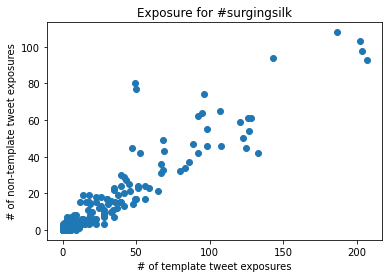

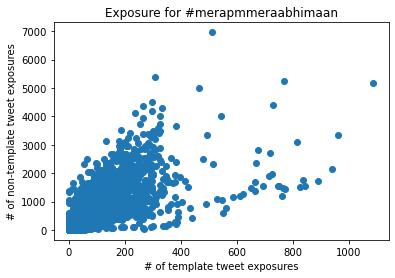

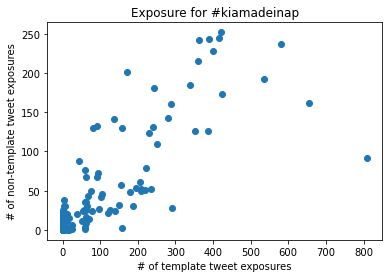

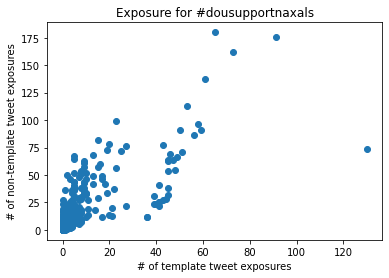

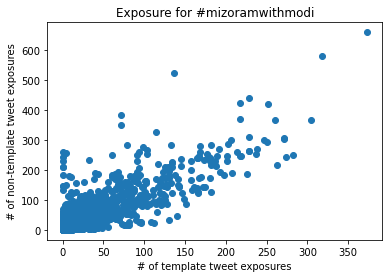

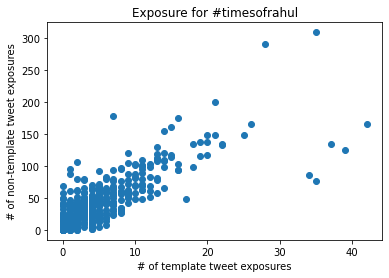

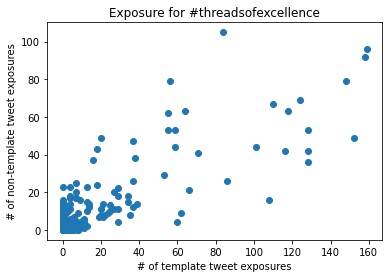

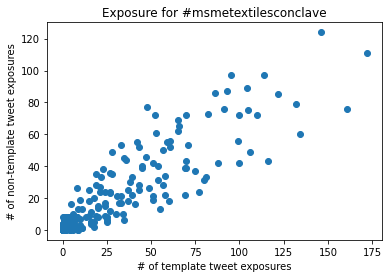

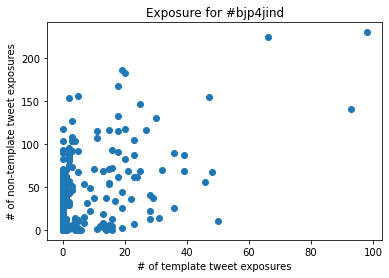

/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2350 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2361 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packag

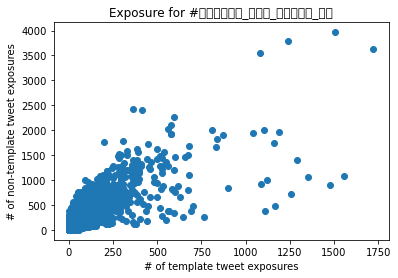

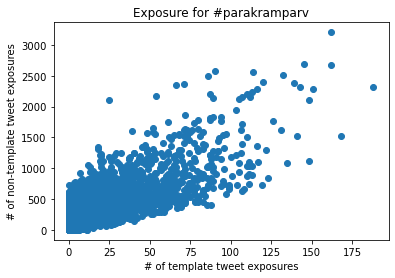

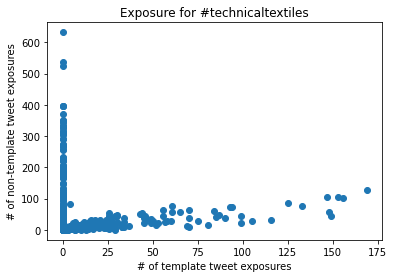

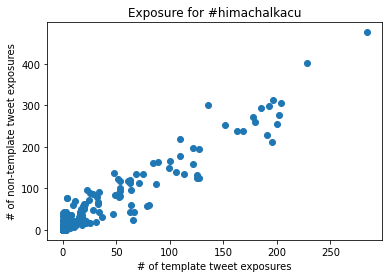

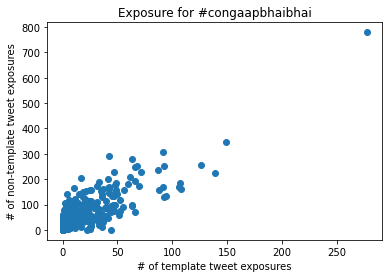

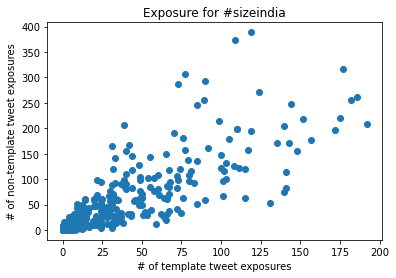

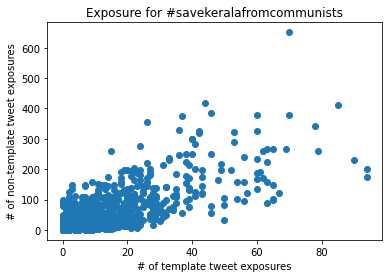

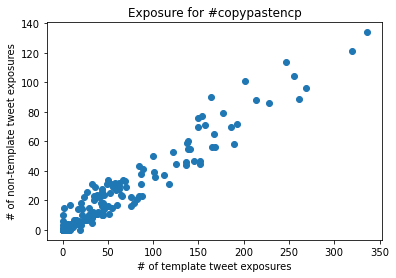

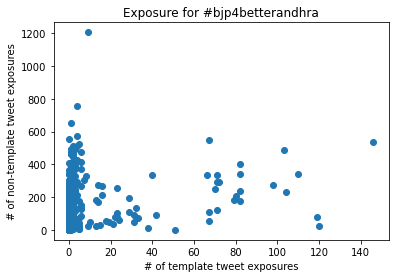

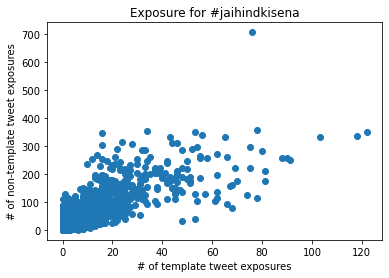

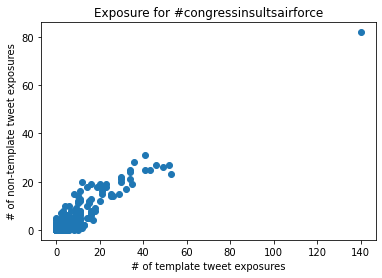

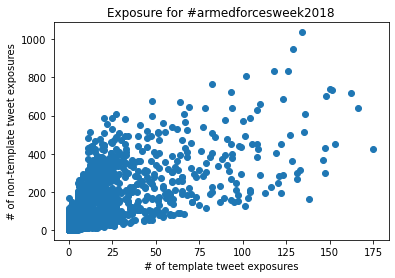

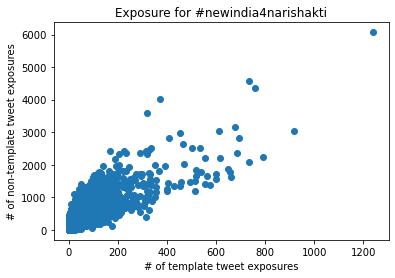

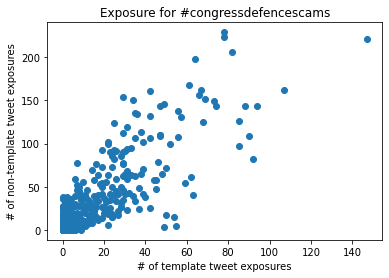

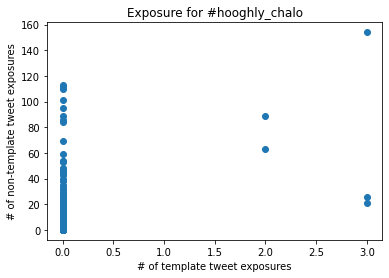

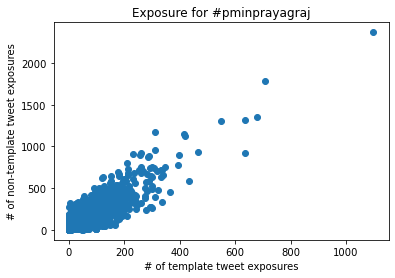

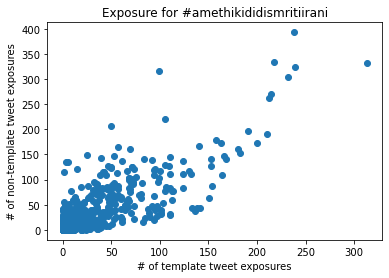

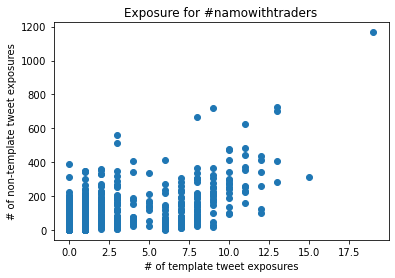

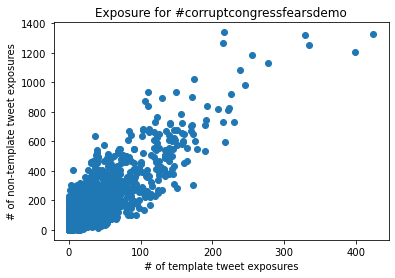

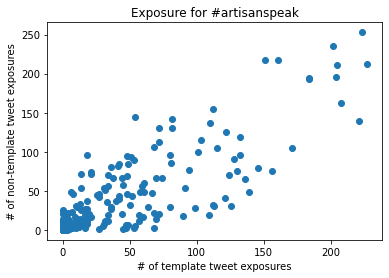

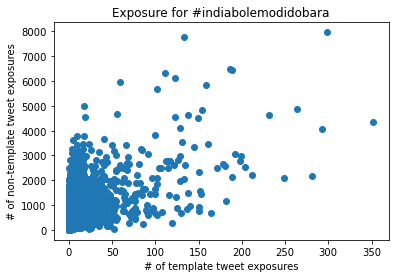

/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2360 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2375 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packag

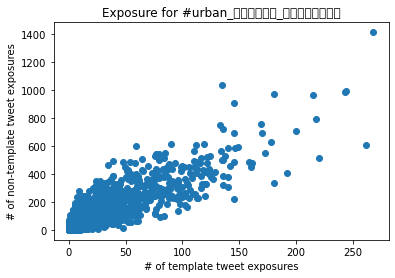

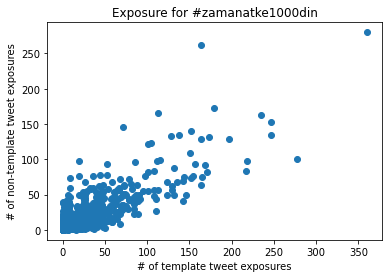

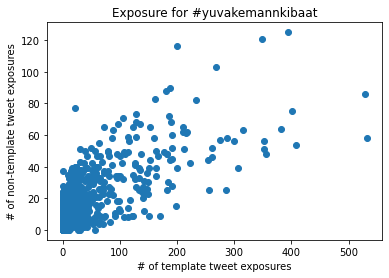

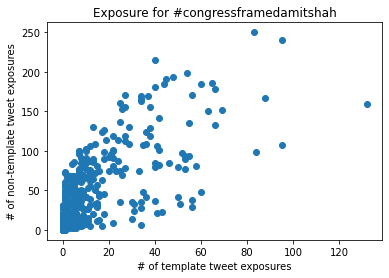

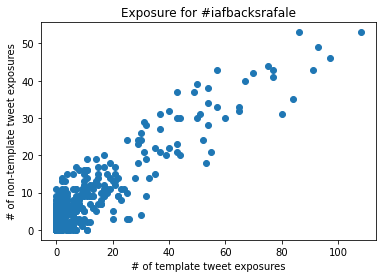

/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 2340 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 2351 missing from current font.
  font.set_text(s, 0, flags=flags)


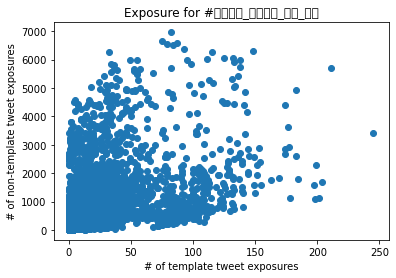

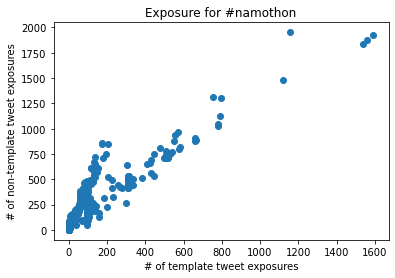

/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2359 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2342 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 2359 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 2342 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/m

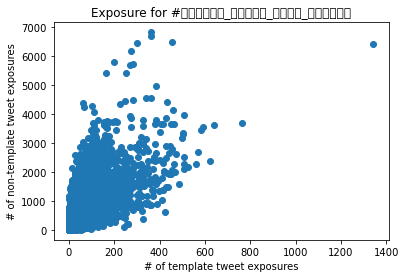

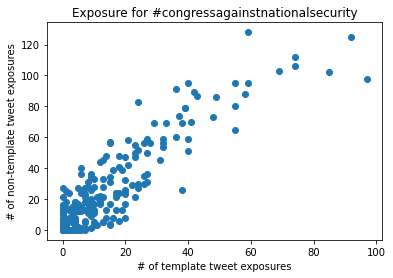

/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2310 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2358 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 2310 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages

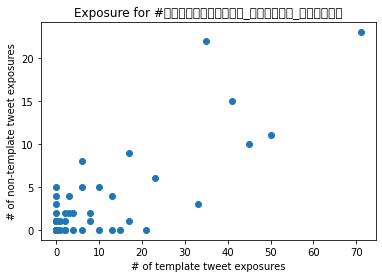

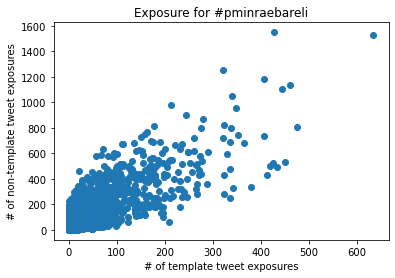

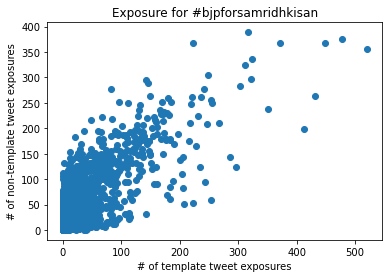

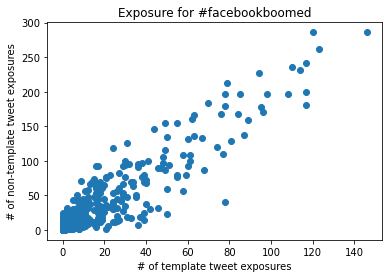

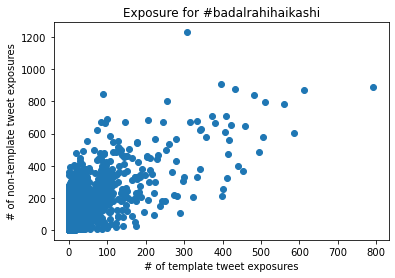

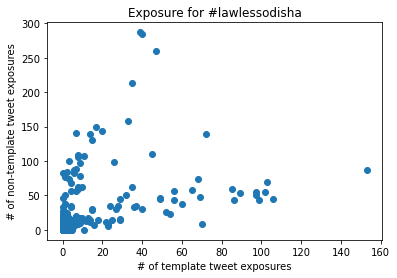

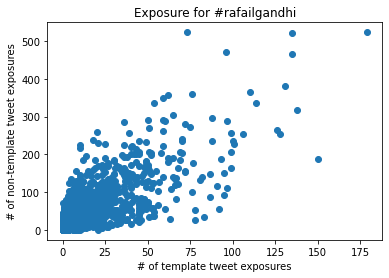

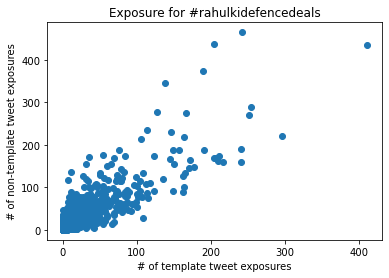

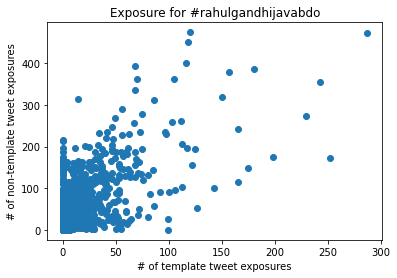

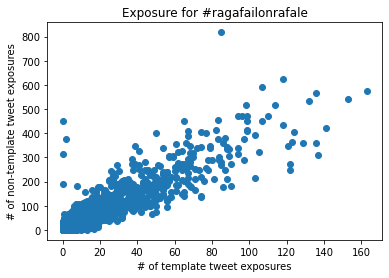

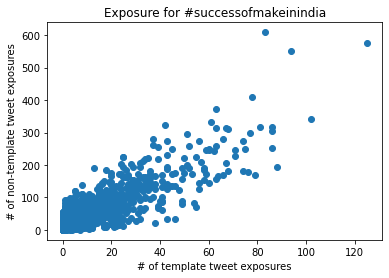

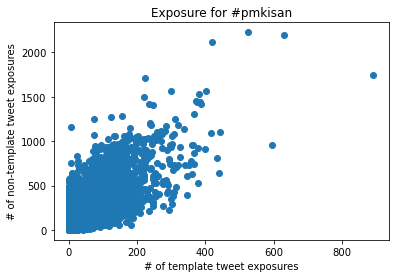

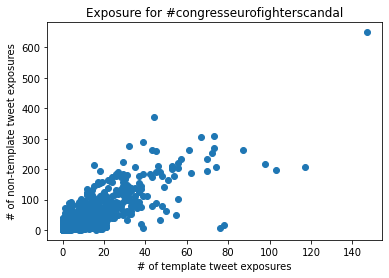

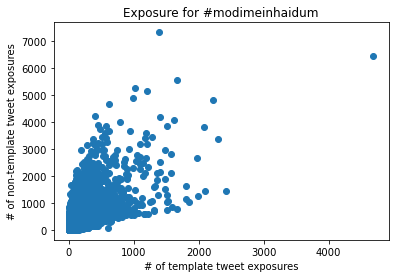

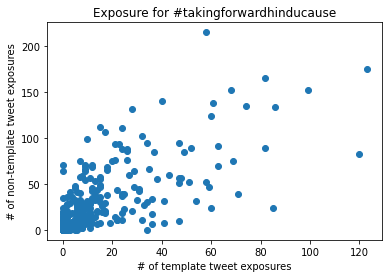

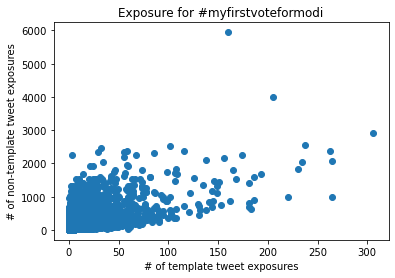

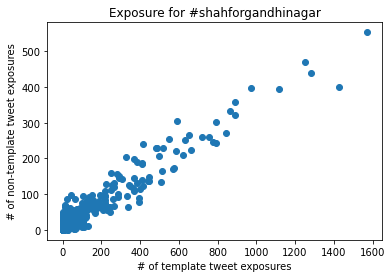

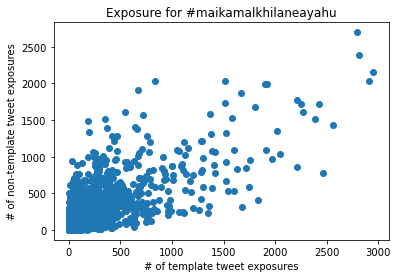

/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2313 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2367 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 2313 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jschless/.conda/envs/gt/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 2367 missing from current font.
  font.set_text(s, 0, flags=flags)


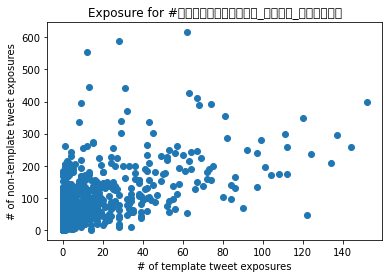

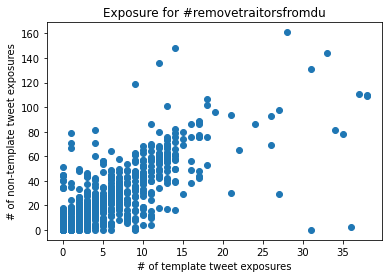

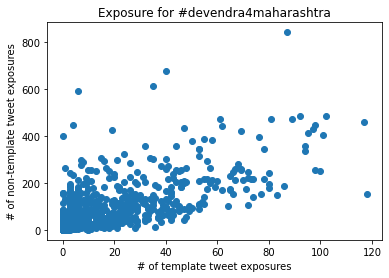

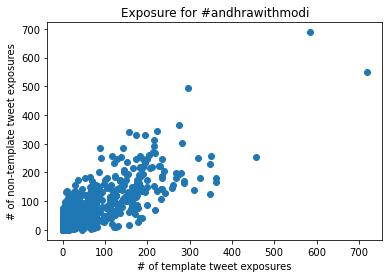

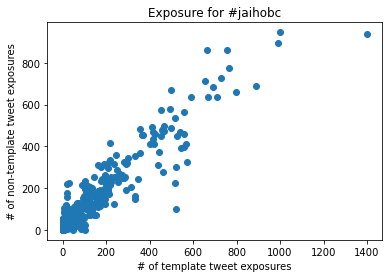

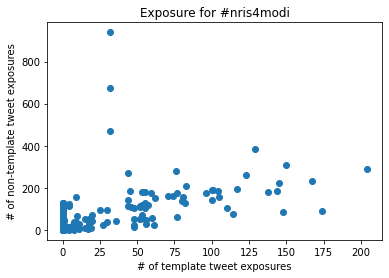

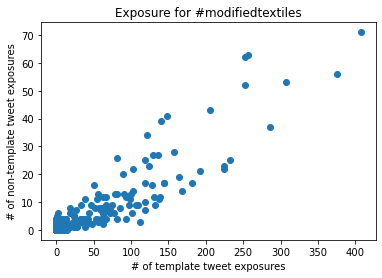

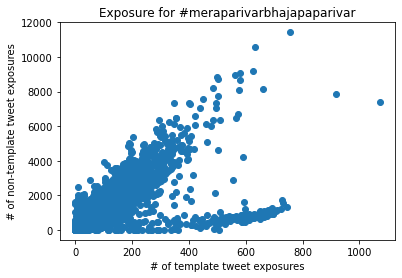

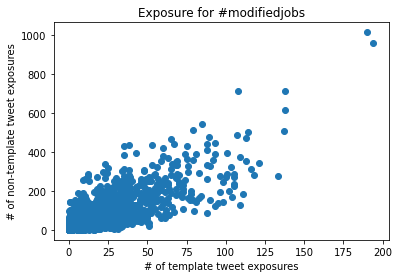

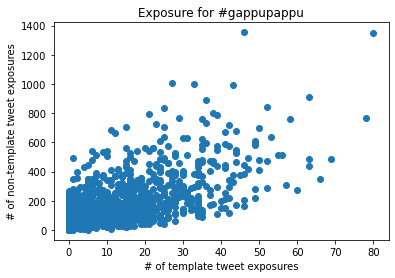

<Figure size 432x288 with 0 Axes>

In [6]:
for ht, ht_results in results.items():
    temps, norms, dates = zip(*list(ht_results.values()))
    plt.scatter(temps, norms)
    plt.title('Exposure for #' + ht)    
    plt.xlabel('# of template tweet exposures')
    plt.ylabel('# of non-template tweet exposures')
    plt.figure()

In [2]:
campaigns = preprocessing.load_campaign()

In [5]:
with open(os.path.join(TWITTER_DATA_DIR, 'exposure_results.pkl'), 'rb') as f:
    results = pickle.load(f)

In [10]:
len(results)
matplotlib.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']

<ipython-input-12-b8ad9c4c6d61>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


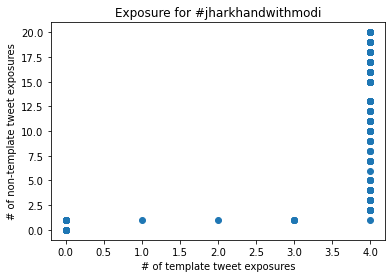

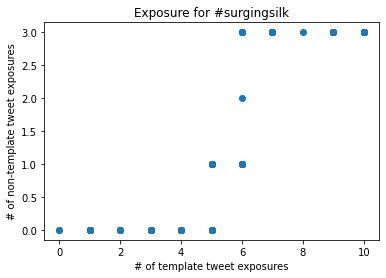

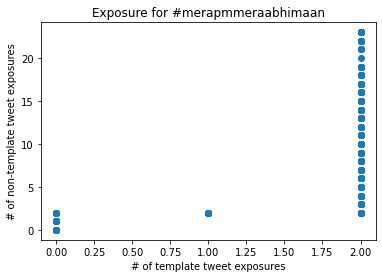

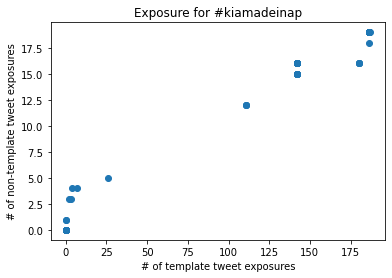

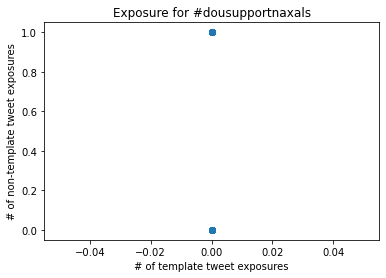

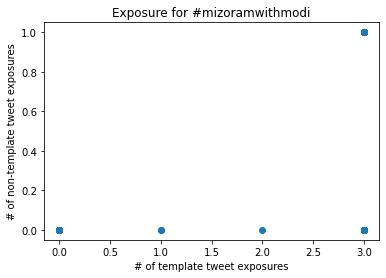

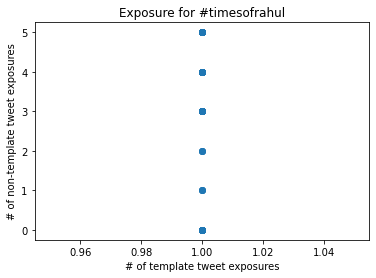

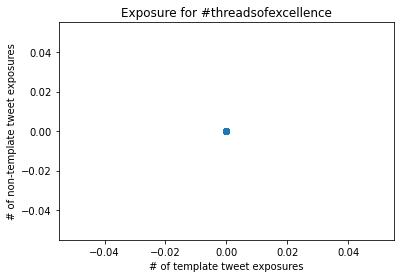

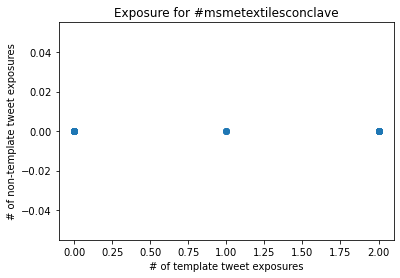

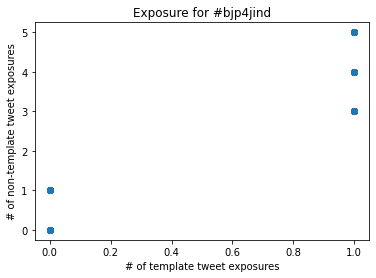

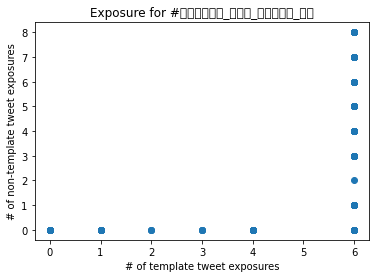

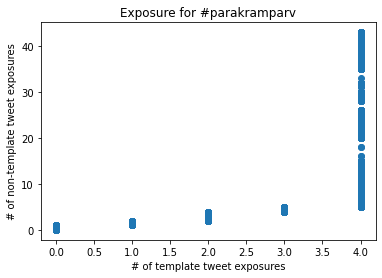

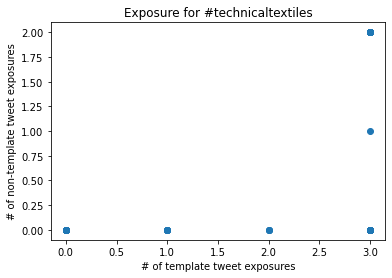

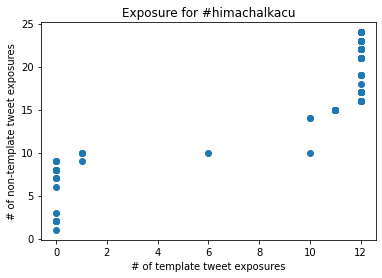

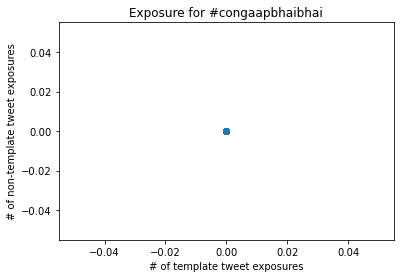

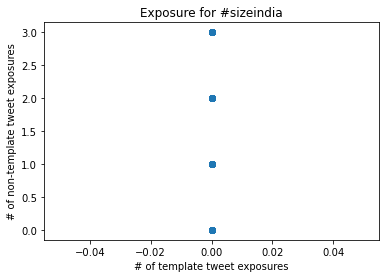

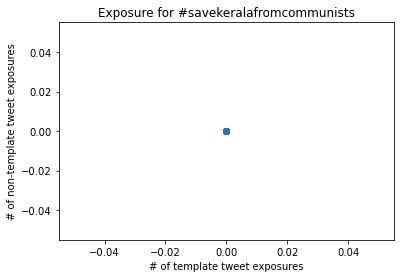

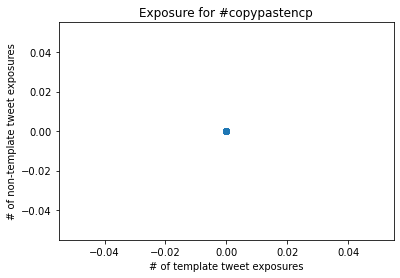

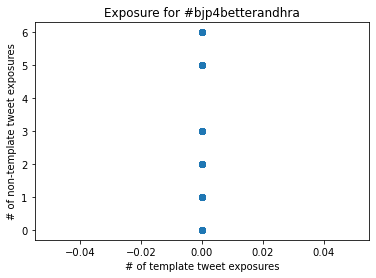

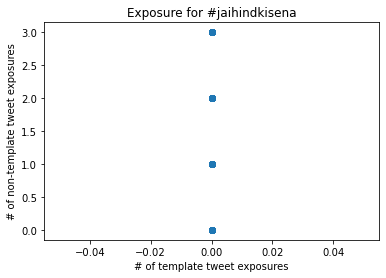

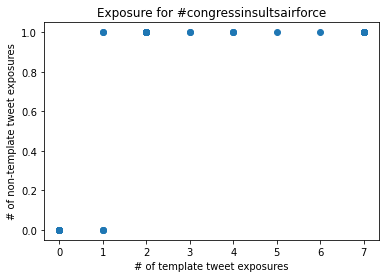

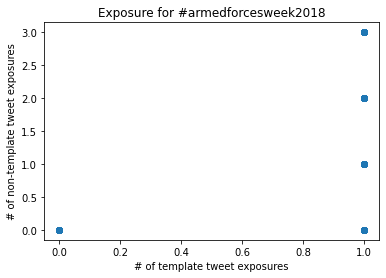

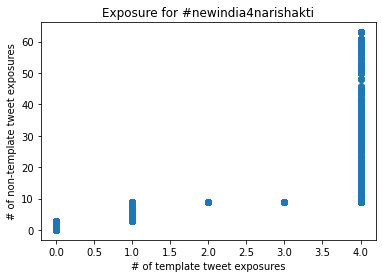

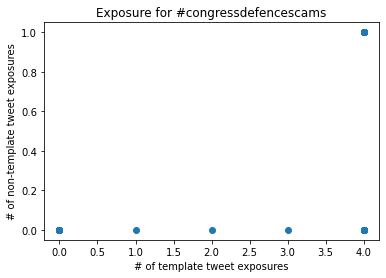

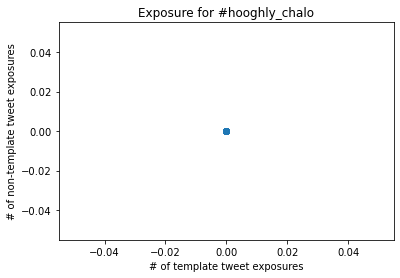

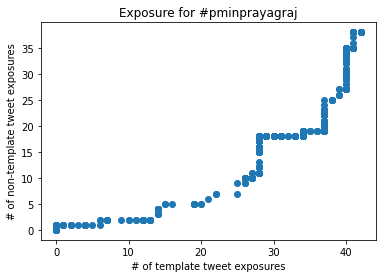

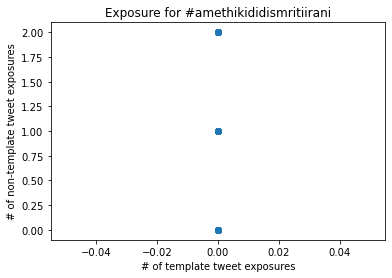

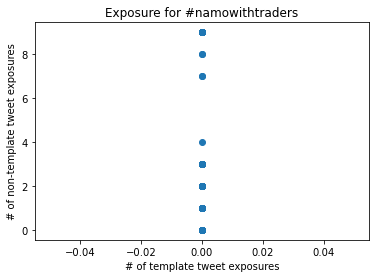

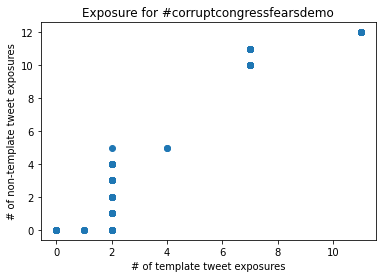

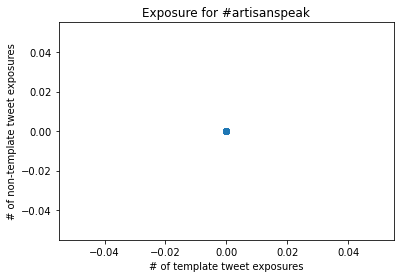

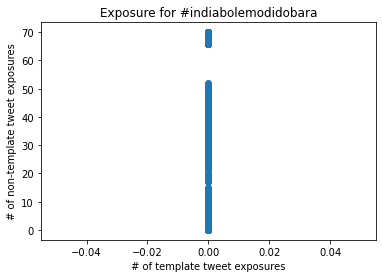

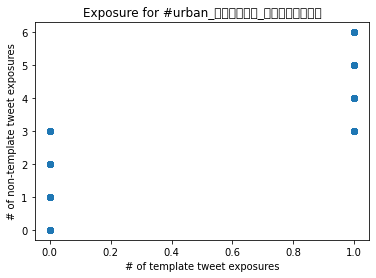

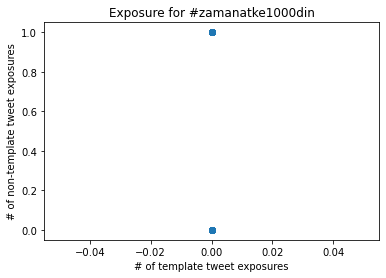

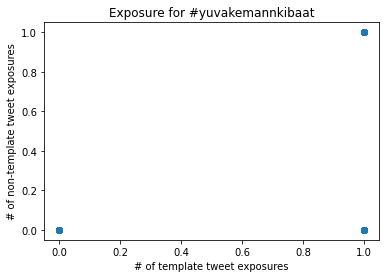

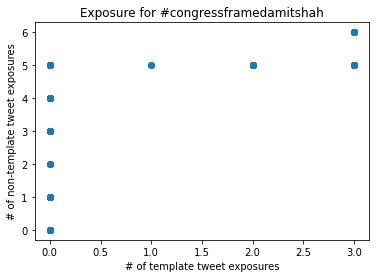

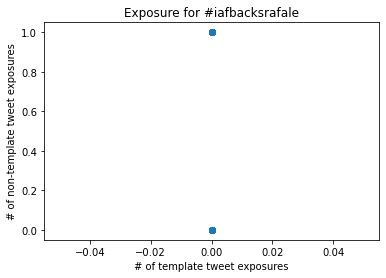

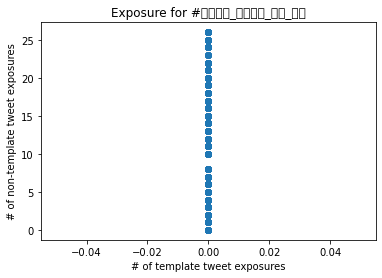

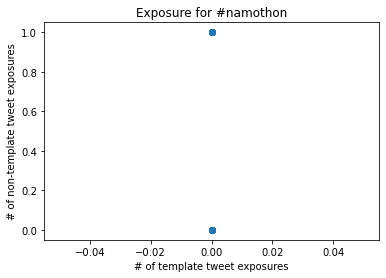

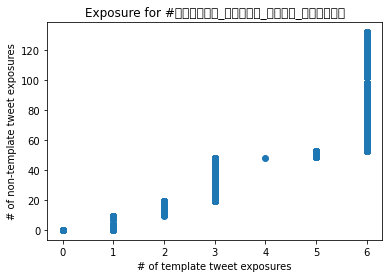

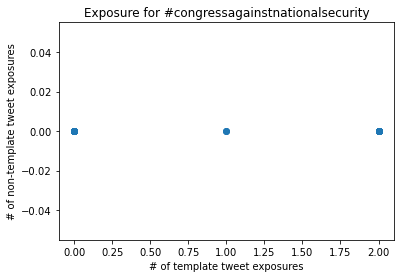

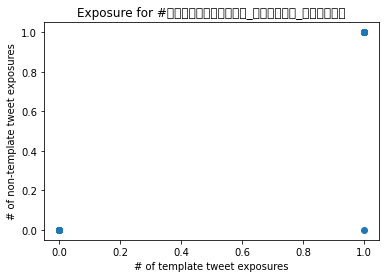

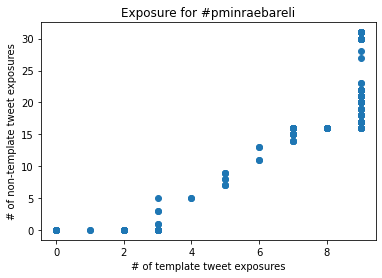

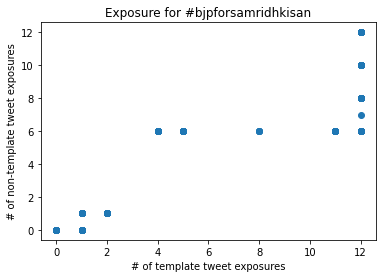

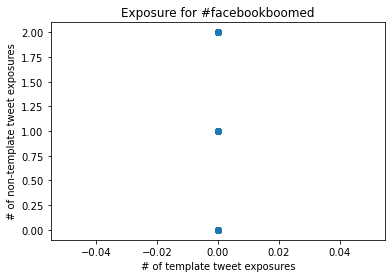

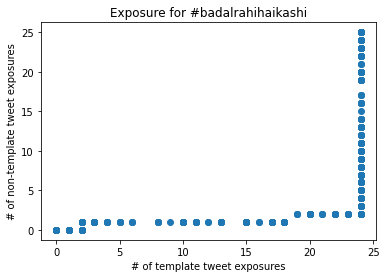

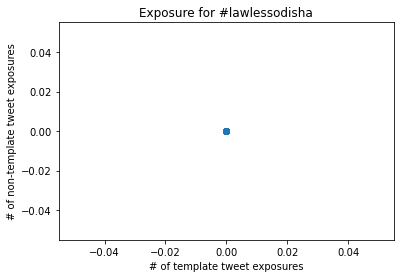

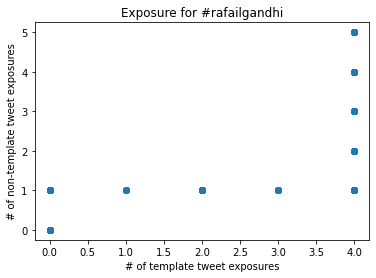

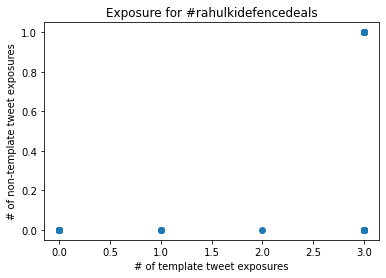

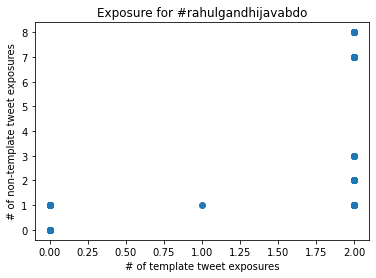

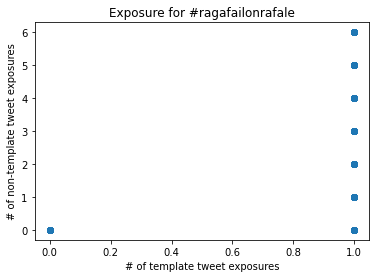

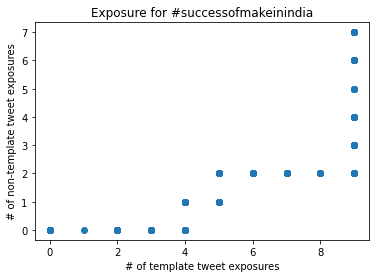

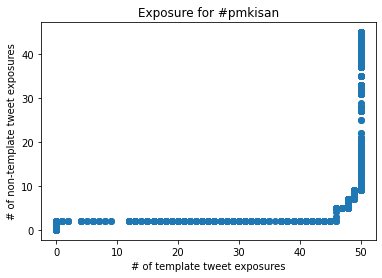

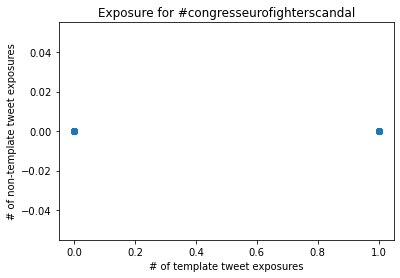

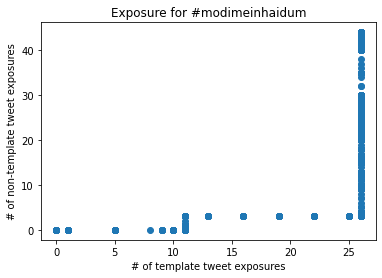

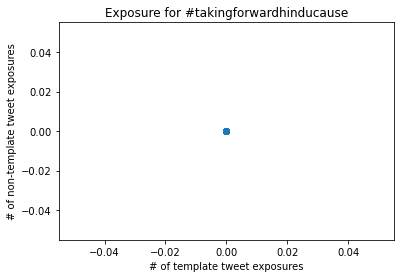

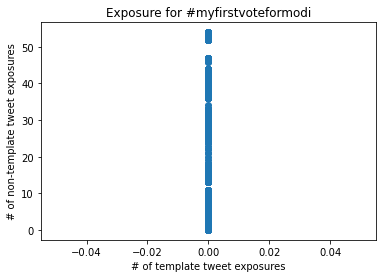

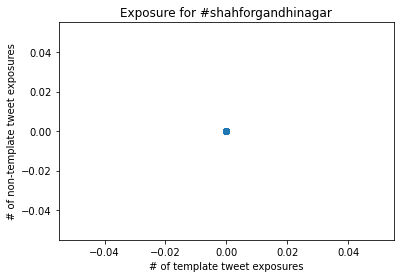

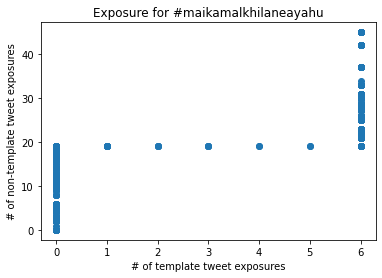

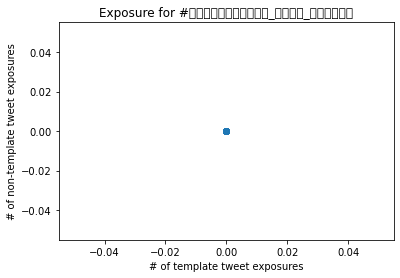

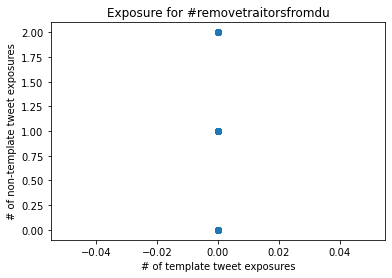

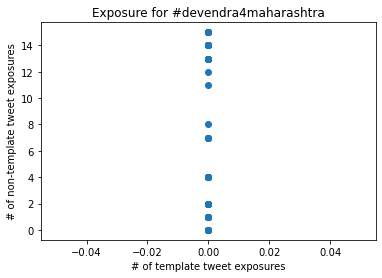

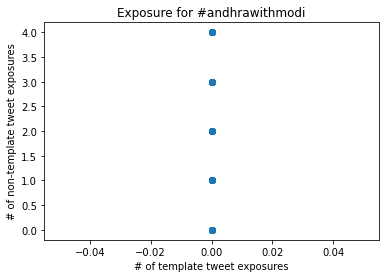

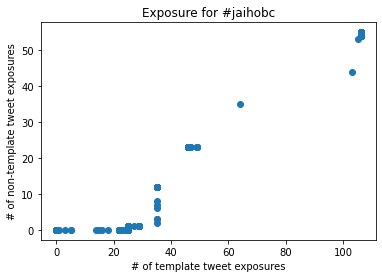

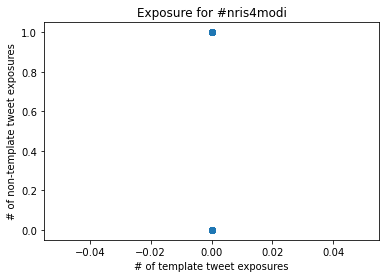

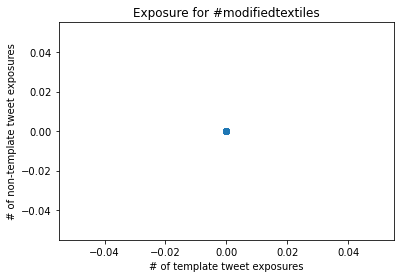

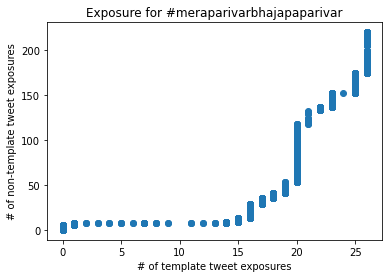

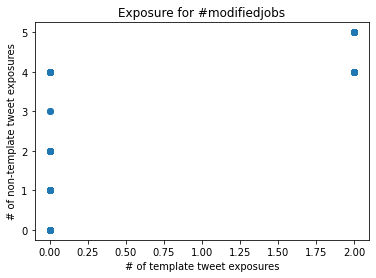

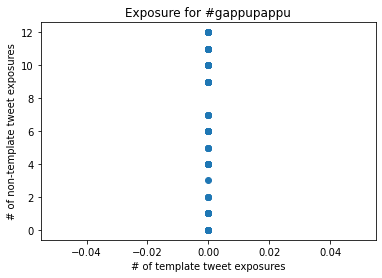

<Figure size 432x288 with 0 Axes>

In [12]:
for ht, ht_results in results.items():
    temps, norms, dates = zip(*list(ht_results.values()))
    plt.scatter(temps, norms)
    plt.title('Exposure for #' + ht)    
    plt.xlabel('# of template tweet exposures')
    plt.ylabel('# of non-template tweet exposures')
    plt.figure()

In [19]:
import random
random.sample([1,2,3,4,5], 19)

ValueError: Sample larger than population or is negative

In [47]:
i = [1,2,3]
xs = [10,20,30,40,50]
xs[i]

TypeError: list indices must be integers or slices, not list

(-50.0, 2000.0)

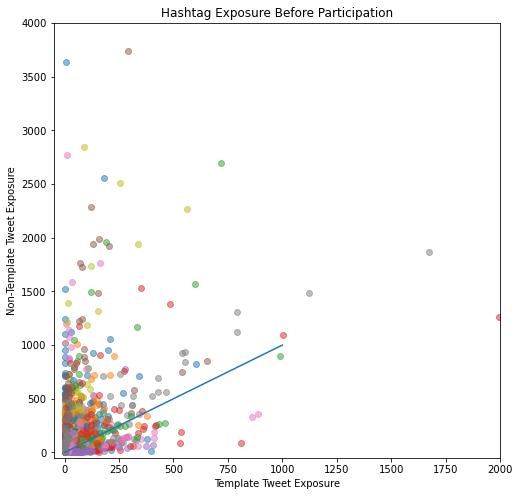

In [49]:
plt.figure(figsize=(8,8))
for ht, ht_results in results.items():
    temps, norms, dates = zip(*list(ht_results.values()))
    n_sample = round((len(temps)+len(norms))*.1)
    n_sample = 100
    try:
        indices = random.sample(list(range(len(temps))), n_sample)
        plt.scatter([temps[i] for i in indices], [norms[i] for i in indices], label=ht, alpha=.5)
    except:
        print(ht, 'was too small')
plt.plot([0,1000],[0,1000])
plt.xlabel('Template Tweet Exposure')
plt.ylabel('Non-Template Tweet Exposure')
plt.title('Hashtag Exposure Before Participation')
plt.ylim(-50,4000)
plt.xlim(-50,2000)
#plt.legend()

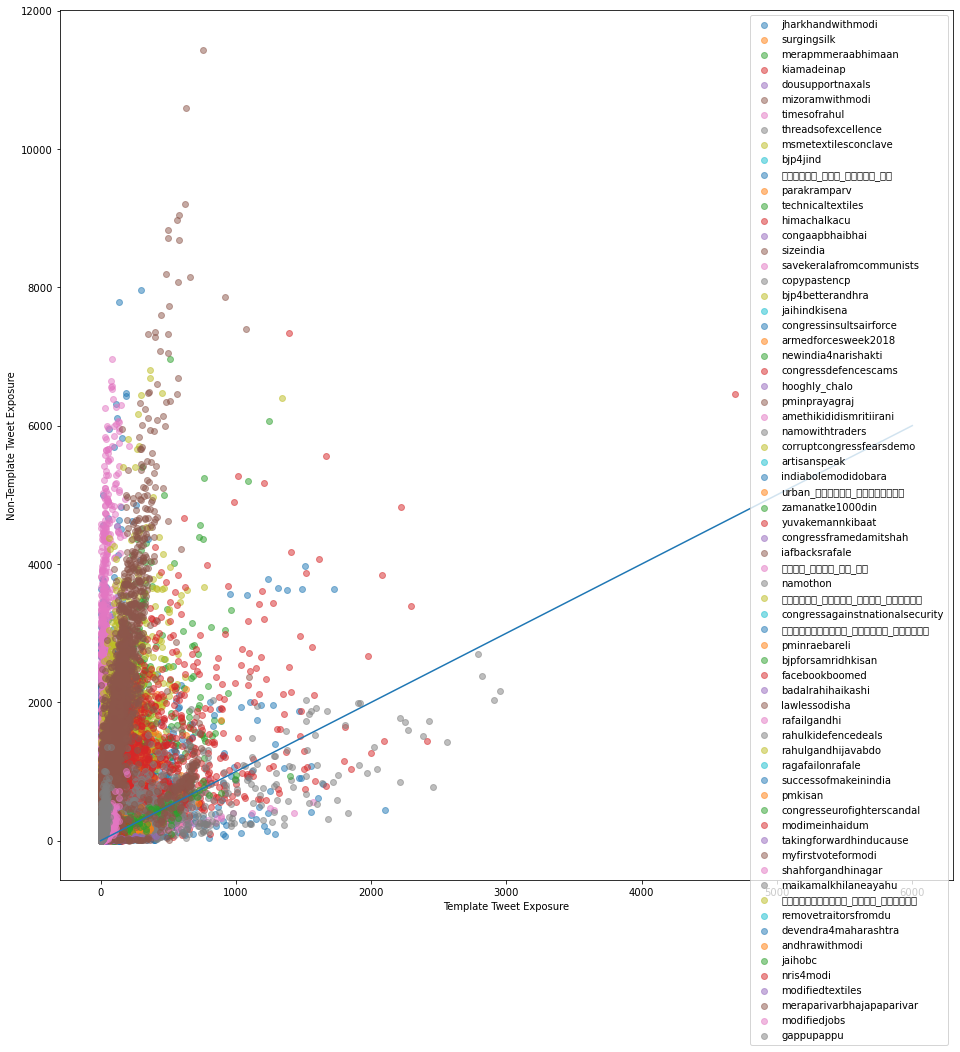

In [14]:
plt.figure(figsize=(16,16))
for ht, ht_results in results.items():
    temps, norms, dates = zip(*list(ht_results.values()))
    plt.scatter(temps, norms, label=ht, alpha=.5)

plt.plot([0,6000],[0,6000])
plt.xlabel('Template Tweet Exposure')
plt.ylabel('Non-Template Tweet Exposure')
plt.legend()

In [11]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Source Han Sans TW',
                                   'sans-serif',
                                    'FreeSerif'                        ]

In [4]:
import warnings
warnings.filterwarnings('ignore')

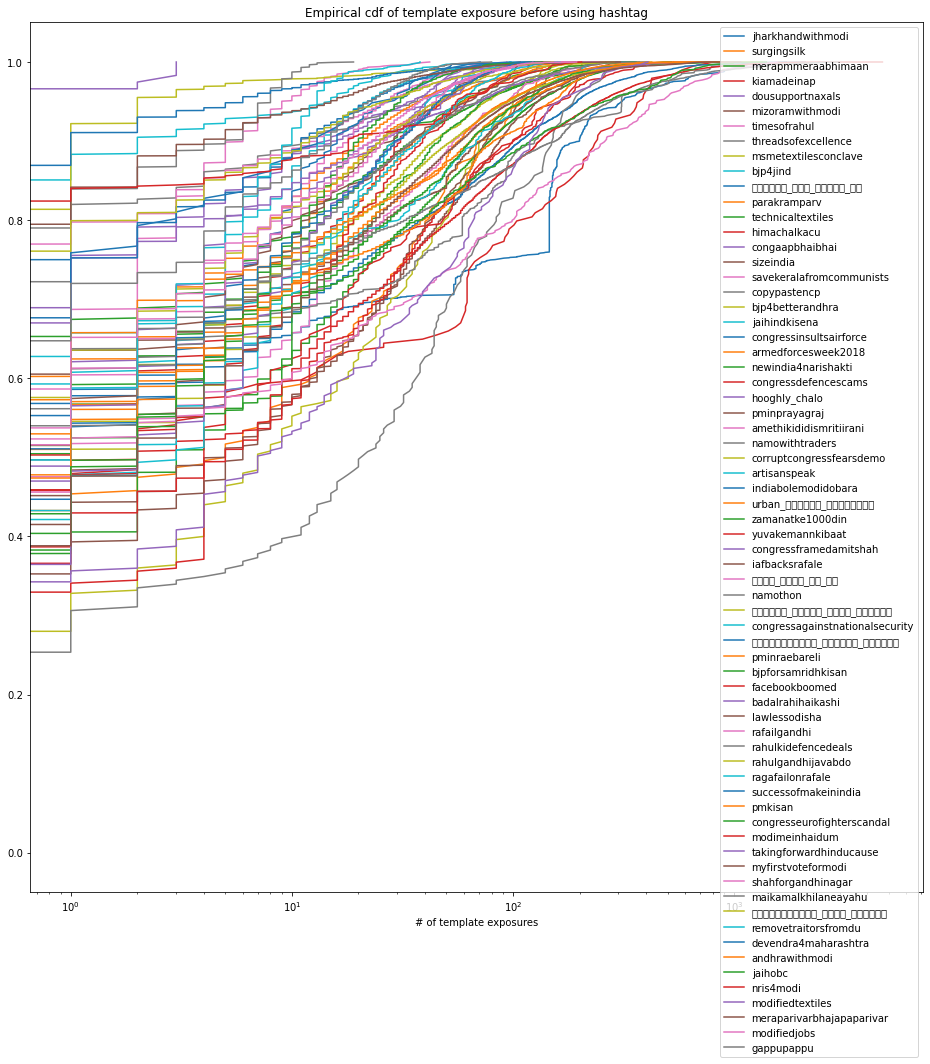

In [14]:
plt.figure(figsize=(16,16))
for ht, ht_results in results.items():
    temps, norms, dates = zip(*list(ht_results.values()))
    ecdf = ECDF(temps)
    plt.plot(ecdf.x, ecdf.y, label=ht)
plt.xscale('log')
plt.title('Empirical cdf of template exposure before using hashtag')
plt.xlabel('# of template exposures')
plt.legend()

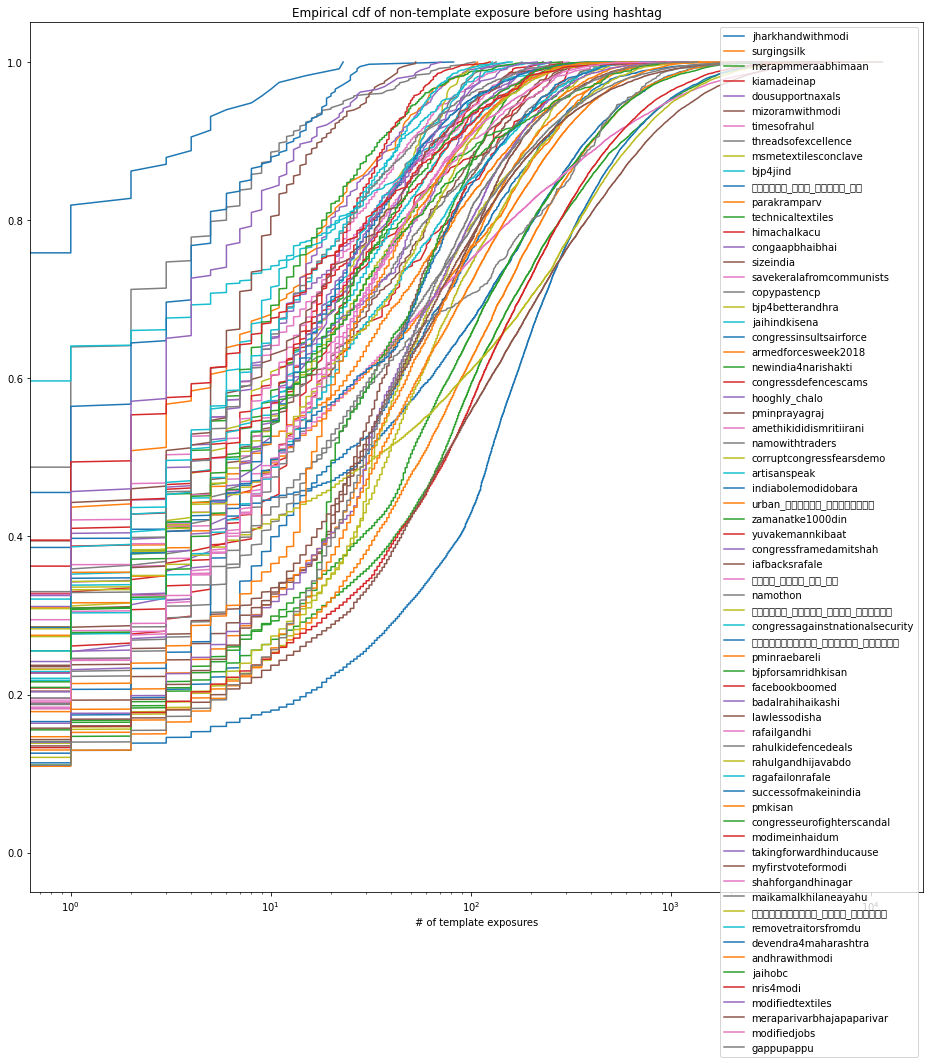

In [15]:
plt.figure(figsize=(16,16))
for ht, ht_results in results.items():
    temps, norms, dates = zip(*list(ht_results.values()))
    ecdf = ECDF(norms)
    plt.plot(ecdf.x, ecdf.y, label=ht)
plt.xscale('log')
plt.title('Empirical cdf of non-template exposure before using hashtag')
plt.xlabel('# of template exposures')
plt.legend()

Text(0.5, 0, '# of total exposures')

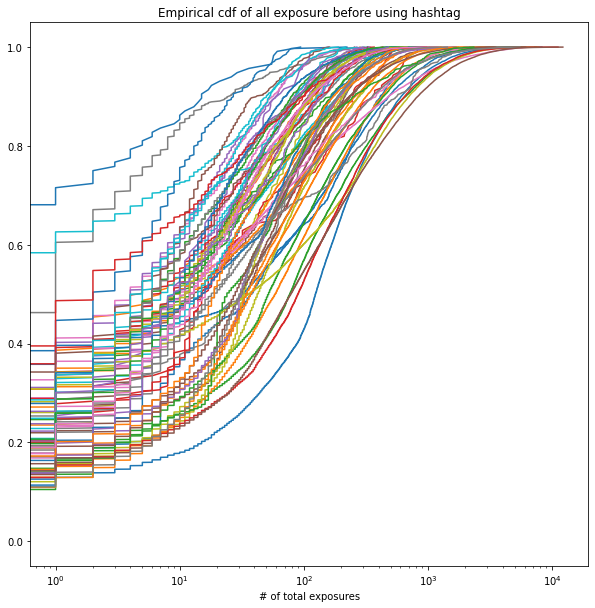

In [12]:
plt.figure(figsize=(10,10))
for ht, ht_results in results.items():
    temps, norms, dates = zip(*list(ht_results.values()))
    ecdf = ECDF([sum(x) for x in zip(temps, norms)])
    plt.plot(ecdf.x, ecdf.y, label=ht)
plt.xscale('log')
plt.title('Empirical cdf of all exposure before using hashtag')
plt.xlabel('# of total exposures')
#plt.legend()

In [6]:
plt.figure(figsize=(16,16))
all_temps = []
all_norms = []
for ht, ht_results in results.items():
    temps, norms, dates = zip(*list(ht_results.values()))
    all_temps += temps
    all_norms += norms

<Figure size 1152x1152 with 0 Axes>

Text(0.5, 0, '# of template exposures')

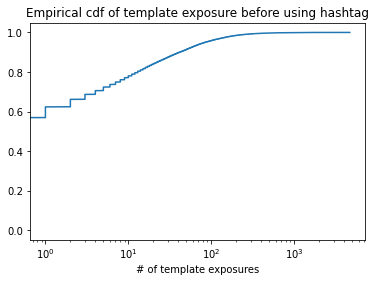

In [20]:
ecdf = ECDF(all_temps)
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of template exposure before using hashtag')
plt.xlabel('# of template exposures')

Text(0.5, 0, '# of non-template exposures')

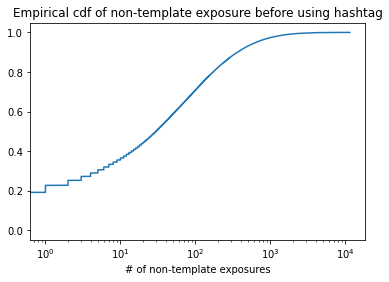

In [9]:
ecdf = ECDF(all_norms)
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of non-template exposure before using hashtag')
plt.xlabel('# of non-template exposures')

Text(0.5, 0, '# of exposures')

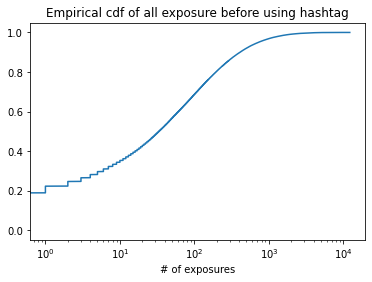

In [8]:
ecdf = ECDF([sum(x) for x in zip(all_norms, all_temps)])
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of all exposure before using hashtag')
plt.xlabel('# of exposures')

In [15]:
temps, norms, dates = zip(*list(results.values()))

Text(0.5, 1.0, 'Tweets by Time')

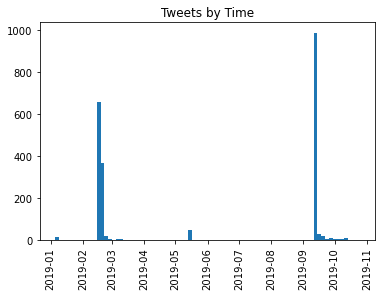

In [16]:
plt.hist(dates, bins=80)
plt.xticks(rotation=90)
plt.title('Tweets by Time')

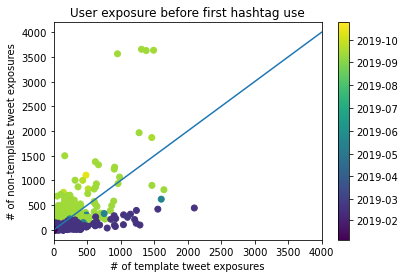

In [38]:

t = [mdates.date2num(d) for d in dates]

fig, ax = plt.subplots()
sc = ax.scatter(temps, norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

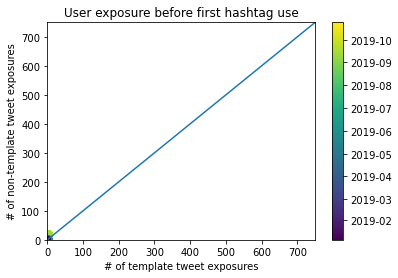

In [33]:
t = [mdates.date2num(d) for d in dates]

fig, ax = plt.subplots()
sc = ax.scatter(temps, norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.ylim([0, 750])
plt.xlim([0, 750])
plt.show()
# plt.xscale('log')
# plt.yscale('log')

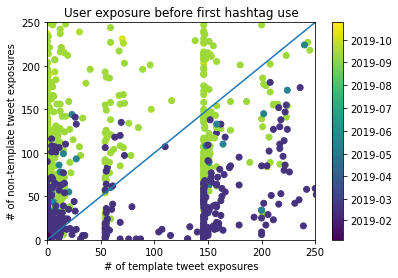

In [19]:
t = [mdates.date2num(d) for d in dates]

fig, ax = plt.subplots()
sc = ax.scatter(temps, norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')

plt.ylim([0, 250])
plt.xlim([0, 250])
plt.show()


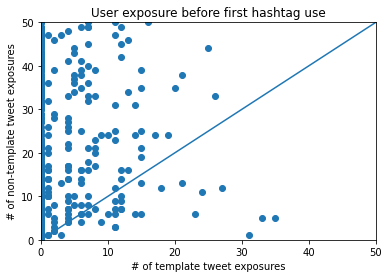

In [20]:
plt.scatter(temps, norms)
plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.ylim([0, 50])
plt.xlim([0, 50])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

Text(0.5, 1.0, 'Total Exposures by Tweet Type')

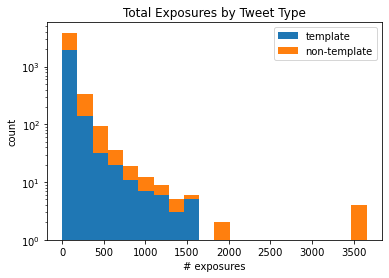

In [21]:
plt.hist([temps, norms], stacked=True, log=True, bins=20, label=['template', 'non-template'])
plt.legend()
plt.xlabel('# exposures')
plt.ylabel('count')
plt.title('Total Exposures by Tweet Type')

## Examining Second Half of Tweets

In [22]:
begin, end = datetime(2019,9,1), datetime(2019,9, 13) #month of september
filtered_results = [(x,y,z) for x,y,z in zip(temps, norms, dates) if z > begin and z < end]
f_temps, f_norms, f_dates = zip(*filtered_results)

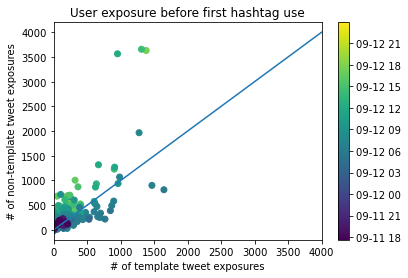

In [23]:
t = [mdates.date2num(d) for d in f_dates]

fig, ax = plt.subplots()
sc = ax.scatter(f_temps, f_norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

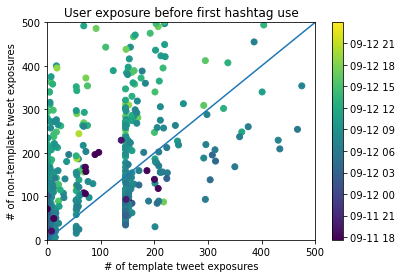

In [24]:
t = [mdates.date2num(d) for d in f_dates]

fig, ax = plt.subplots()
sc = ax.scatter(f_temps, f_norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 500])
plt.ylim([0, 500])

plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

Text(0.5, 1.0, 'Total Exposures by Tweet Type')

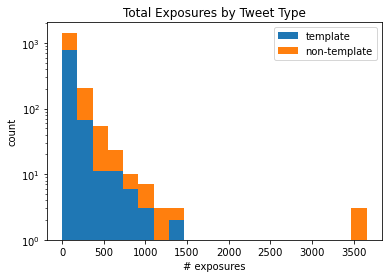

In [25]:
plt.hist([f_temps, f_norms], stacked=True, log=True, bins=20, label=['template', 'non-template'])
plt.legend()
plt.xlabel('# exposures')
plt.ylabel('count')
plt.title('Total Exposures by Tweet Type')

Text(0.5, 0, '# of template exposures')

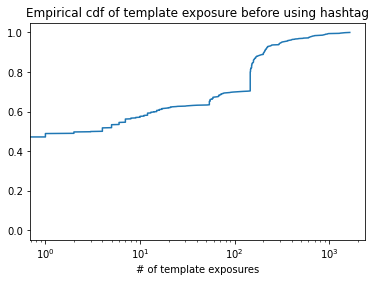

In [26]:
ecdf = ECDF(f_temps)
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of template exposure before using hashtag')
plt.xlabel('# of template exposures')

Text(0.5, 0, '# of non-template exposures')

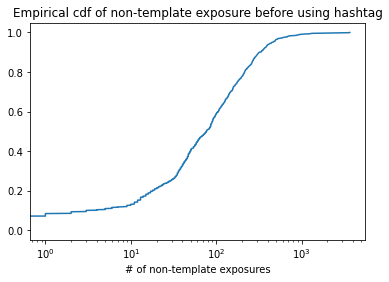

In [27]:
ecdf = ECDF(f_norms)
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of non-template exposure before using hashtag')
plt.xlabel('# of non-template exposures')

Text(0.5, 0, '# of exposures')

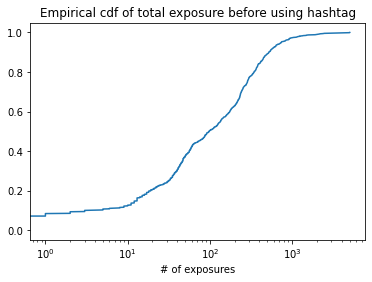

In [28]:
ecdf = ECDF([x+y for x,y in zip(f_temps,f_norms)])
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of total exposure before using hashtag')
plt.xlabel('# of exposures')

## Examining First Half of Tweets

In [29]:
begin, end = datetime(2019,2,10), datetime(2019,2,20) #month of february
filtered_results = [(x,y,z) for x,y,z in zip(temps, norms, dates) if z > begin and z < end]
f_temps, f_norms, f_dates = zip(*filtered_results)

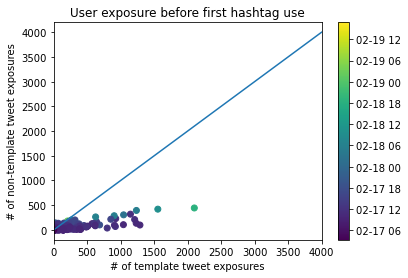

In [30]:
t = [mdates.date2num(d) for d in f_dates]

fig, ax = plt.subplots()
sc = ax.scatter(f_temps, f_norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

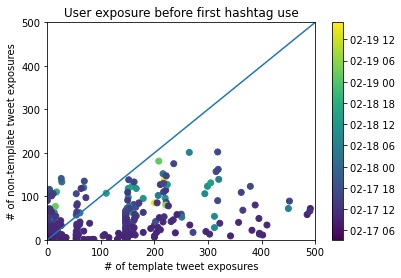

In [31]:
t = [mdates.date2num(d) for d in f_dates]

fig, ax = plt.subplots()
sc = ax.scatter(f_temps, f_norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 500])
plt.ylim([0, 500])

plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

Text(0.5, 1.0, 'Total Exposures by Tweet Type')

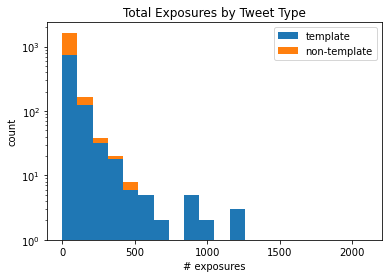

In [32]:
plt.hist([f_temps, f_norms], stacked=True, log=True, bins=20, label=['template', 'non-template'])
plt.legend()
plt.xlabel('# exposures')
plt.ylabel('count')
plt.title('Total Exposures by Tweet Type')

Text(0.5, 0, '# of template exposures')

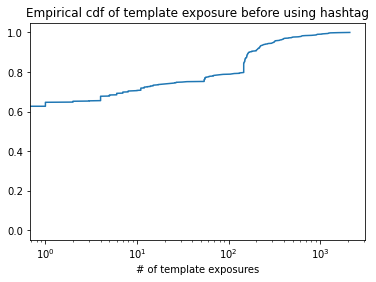

In [33]:
ecdf = ECDF(f_temps)
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of template exposure before using hashtag')
plt.xlabel('# of template exposures')

Text(0.5, 0, '# of non-template exposures')

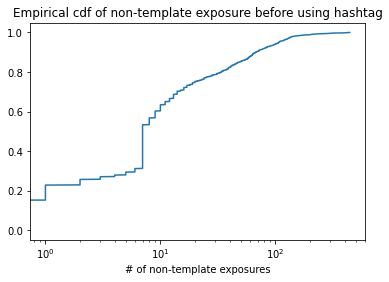

In [34]:
ecdf = ECDF(f_norms)
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of non-template exposure before using hashtag')
plt.xlabel('# of non-template exposures')

Text(0.5, 0, '# of exposures')

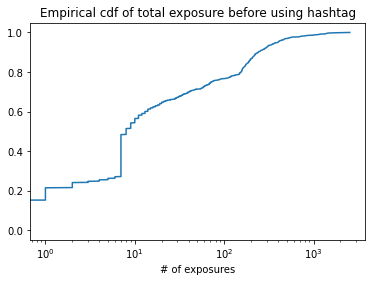

In [35]:
ecdf = ECDF([x+y for x,y in zip(f_temps,f_norms)])
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of total exposure before using hashtag')
plt.xlabel('# of exposures')

# Only looking at non-template tweets

In [86]:
results = {} #username -> (# template, # non-template)
sorted_tweets = sorted(tweets.values(), key=lambda x: x['date'])[::-1]
#sorted_tweets = [x for x in sorted_tweets if followers_dict[x['username']] is not None]
for i in tqdm(range(len(sorted_tweets))):
    child = sorted_tweets[i]
    n_temp, n_norm = 0, 0
    for j in range(i, len(sorted_tweets)):
        #print(sorted_tweets[j]['id'])
        followers = followers_dict[sorted_tweets[j]['username']]
        if followers is None:
            followers = set()
        if child['username'] in followers:
            if sorted_tweets[j]['template'] != '':
                n_temp += 1
            else:
                n_norm += 1
    if child['template'] == '':
        results[child['username']] = (n_temp, n_norm, child['date'])

100%|██████████| 13908/13908 [00:33<00:00, 421.09it/s] 


In [87]:
temps, norms, dates = zip(*list(results.values()))

Text(0.5, 1.0, 'Tweets by Time')

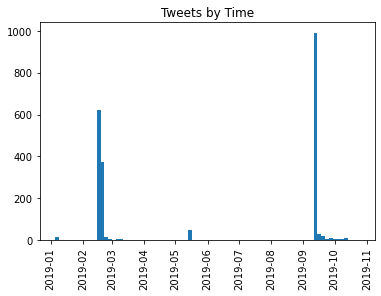

In [38]:
plt.hist(dates, bins=80)
plt.xticks(rotation=90)
plt.title('Tweets by Time')

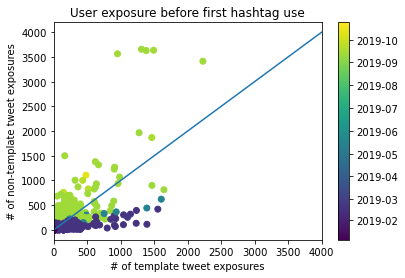

In [39]:

t = [mdates.date2num(d) for d in dates]

fig, ax = plt.subplots()
sc = ax.scatter(temps, norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

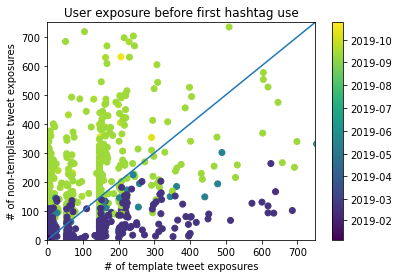

In [40]:
t = [mdates.date2num(d) for d in dates]

fig, ax = plt.subplots()
sc = ax.scatter(temps, norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.ylim([0, 750])
plt.xlim([0, 750])
plt.show()
# plt.xscale('log')
# plt.yscale('log')

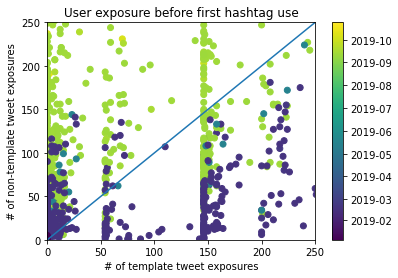

In [41]:
t = [mdates.date2num(d) for d in dates]

fig, ax = plt.subplots()
sc = ax.scatter(temps, norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')

plt.ylim([0, 250])
plt.xlim([0, 250])
plt.show()


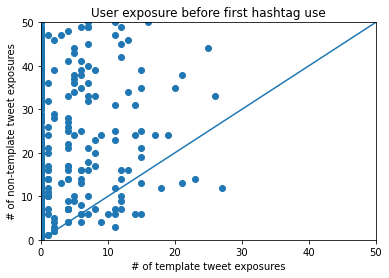

In [42]:
plt.scatter(temps, norms)
plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.ylim([0, 50])
plt.xlim([0, 50])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

Text(0.5, 1.0, 'Total Exposures by Tweet Type')

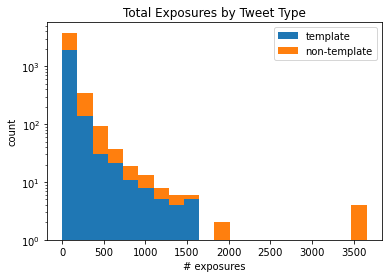

In [43]:
plt.hist([temps, norms], stacked=True, log=True, bins=20, label=['template', 'non-template'])
plt.legend()
plt.xlabel('# exposures')
plt.ylabel('count')
plt.title('Total Exposures by Tweet Type')

## Examining Second Half of Tweets

In [44]:
begin, end = datetime(2019,9,1), datetime(2019,9, 13) #month of september
filtered_results = [(x,y,z) for x,y,z in zip(temps, norms, dates) if z > begin and z < end]
f_temps, f_norms, f_dates = zip(*filtered_results)

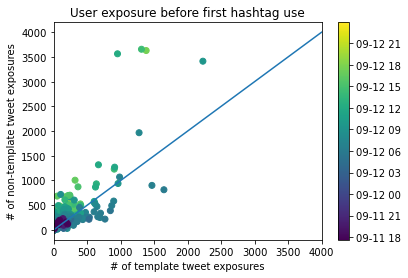

In [45]:
t = [mdates.date2num(d) for d in f_dates]

fig, ax = plt.subplots()
sc = ax.scatter(f_temps, f_norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

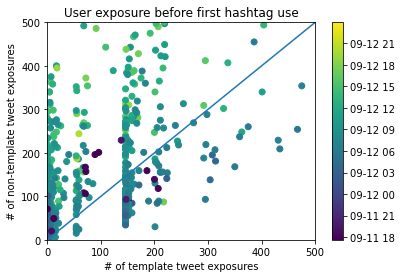

In [46]:
t = [mdates.date2num(d) for d in f_dates]

fig, ax = plt.subplots()
sc = ax.scatter(f_temps, f_norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 500])
plt.ylim([0, 500])

plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

Text(0.5, 1.0, 'Total Exposures by Tweet Type')

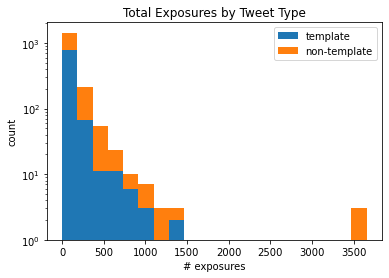

In [47]:
plt.hist([f_temps, f_norms], stacked=True, log=True, bins=20, label=['template', 'non-template'])
plt.legend()
plt.xlabel('# exposures')
plt.ylabel('count')
plt.title('Total Exposures by Tweet Type')

Text(0.5, 0, '# of template exposures')

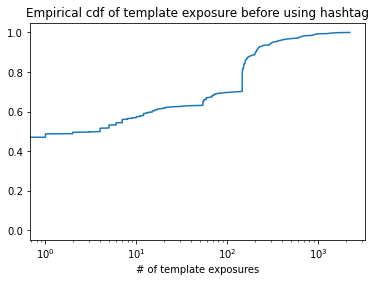

In [48]:
ecdf = ECDF(f_temps)
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of template exposure before using hashtag')
plt.xlabel('# of template exposures')

Text(0.5, 0, '# of non-template exposures')

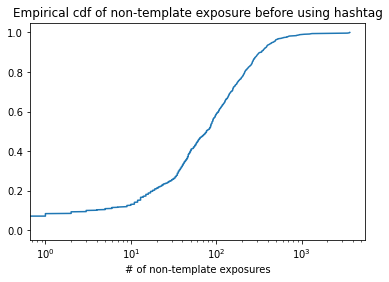

In [49]:
ecdf = ECDF(f_norms)
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of non-template exposure before using hashtag')
plt.xlabel('# of non-template exposures')

Text(0.5, 0, '# of exposures')

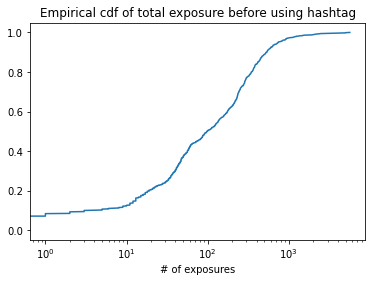

In [50]:
ecdf = ECDF([x+y for x,y in zip(f_temps,f_norms)])
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of total exposure before using hashtag')
plt.xlabel('# of exposures')

## Examining First Half of Tweets

In [51]:
begin, end = datetime(2019,2,10), datetime(2019,2,20) #month of february
filtered_results = [(x,y,z) for x,y,z in zip(temps, norms, dates) if z > begin and z < end]
f_temps, f_norms, f_dates = zip(*filtered_results)

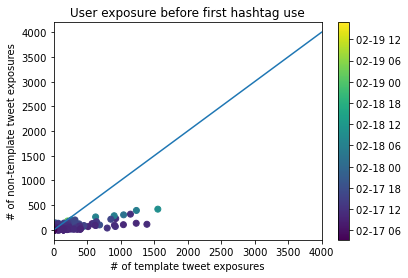

In [52]:
t = [mdates.date2num(d) for d in f_dates]

fig, ax = plt.subplots()
sc = ax.scatter(f_temps, f_norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

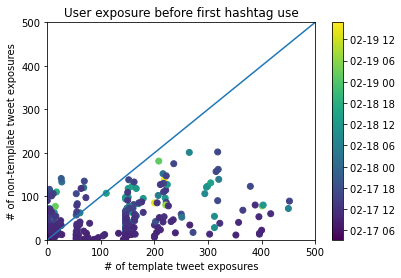

In [53]:
t = [mdates.date2num(d) for d in f_dates]

fig, ax = plt.subplots()
sc = ax.scatter(f_temps, f_norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 500])
plt.ylim([0, 500])

plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

Text(0.5, 1.0, 'Total Exposures by Tweet Type')

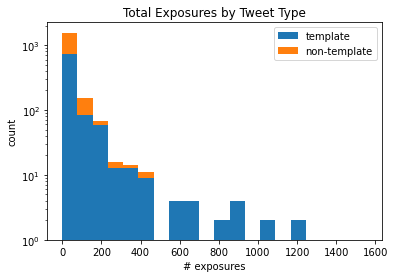

In [54]:
plt.hist([f_temps, f_norms], stacked=True, log=True, bins=20, label=['template', 'non-template'])
plt.legend()
plt.xlabel('# exposures')
plt.ylabel('count')
plt.title('Total Exposures by Tweet Type')

Text(0.5, 0, '# of template exposures')

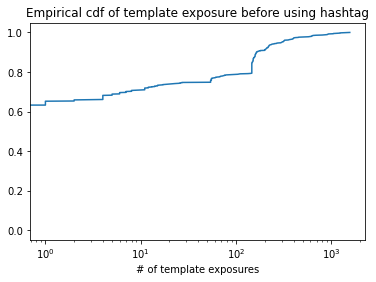

In [55]:
ecdf = ECDF(f_temps)
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of template exposure before using hashtag')
plt.xlabel('# of template exposures')

Text(0.5, 0, '# of non-template exposures')

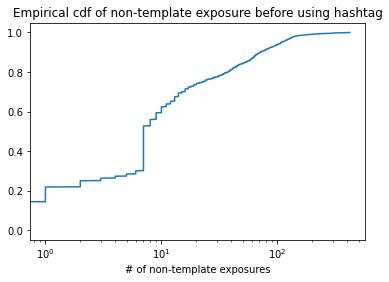

In [56]:
ecdf = ECDF(f_norms)
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of non-template exposure before using hashtag')
plt.xlabel('# of non-template exposures')

Text(0.5, 0, '# of exposures')

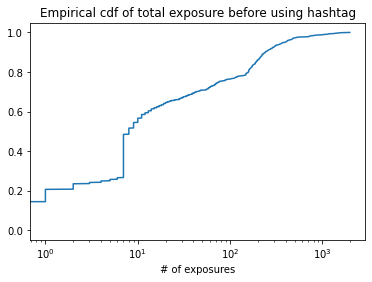

In [57]:
ecdf = ECDF([x+y for x,y in zip(f_temps,f_norms)])
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of total exposure before using hashtag')
plt.xlabel('# of exposures')

# Distribution of Template Tweets

In [58]:
results = {} #username -> (# template, # non-template)
sorted_tweets = sorted(tweets.values(), key=lambda x: x['date'])[::-1]
#sorted_tweets = [x for x in sorted_tweets if followers_dict[x['username']] is not None]
for i in tqdm(range(len(sorted_tweets))):
    child = sorted_tweets[i]
    n_temp, n_norm = 0, 0
    for j in range(i, len(sorted_tweets)):
        #print(sorted_tweets[j]['id'])
        followers = followers_dict[sorted_tweets[j]['username']]
        if followers is None:
            followers = set()
        if child['username'] in followers:
            if sorted_tweets[j]['template'] != '':
                n_temp += 1
            else:
                n_norm += 1
    if child['template'] != '':
        results[child['username']] = (n_temp, n_norm, child['date'])

100%|██████████| 13908/13908 [00:33<00:00, 416.32it/s] 


In [59]:
temps, norms, dates = zip(*list(results.values()))

Text(0.5, 1.0, 'Tweets by Time')

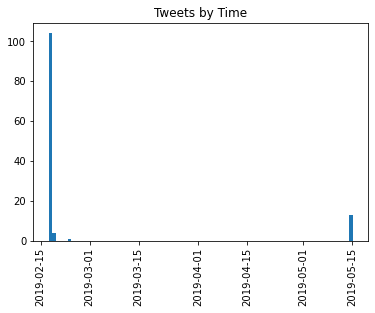

In [60]:
plt.hist(dates, bins=80)
plt.xticks(rotation=90)
plt.title('Tweets by Time')

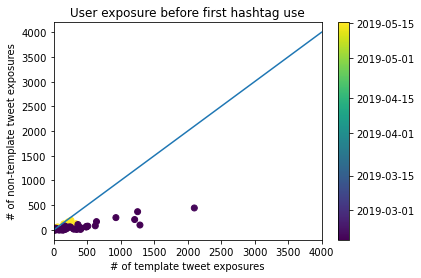

In [61]:

t = [mdates.date2num(d) for d in dates]

fig, ax = plt.subplots()
sc = ax.scatter(temps, norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

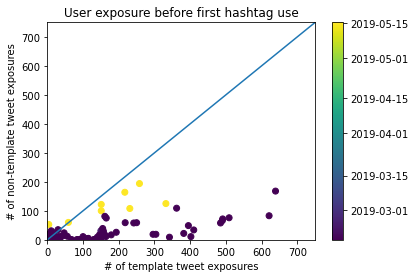

In [62]:
t = [mdates.date2num(d) for d in dates]

fig, ax = plt.subplots()
sc = ax.scatter(temps, norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.ylim([0, 750])
plt.xlim([0, 750])
plt.show()
# plt.xscale('log')
# plt.yscale('log')

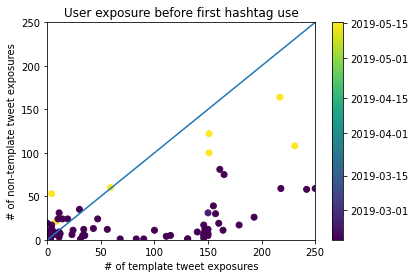

In [63]:
t = [mdates.date2num(d) for d in dates]

fig, ax = plt.subplots()
sc = ax.scatter(temps, norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')

plt.ylim([0, 250])
plt.xlim([0, 250])
plt.show()


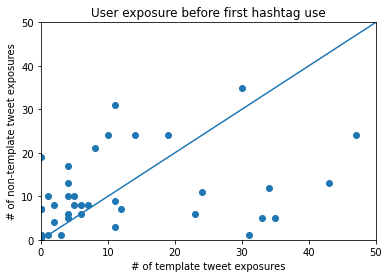

In [64]:
plt.scatter(temps, norms)
plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.ylim([0, 50])
plt.xlim([0, 50])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

Text(0.5, 1.0, 'Total Exposures by Tweet Type')

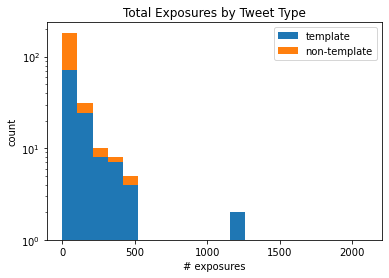

In [65]:
plt.hist([temps, norms], stacked=True, log=True, bins=20, label=['template', 'non-template'])
plt.legend()
plt.xlabel('# exposures')
plt.ylabel('count')
plt.title('Total Exposures by Tweet Type')

## Examining Second Half of Tweets
There were none

## Examining First Half of Tweets

In [66]:
begin, end = datetime(2019,2,10), datetime(2019,2,20) #month of february
filtered_results = [(x,y,z) for x,y,z in zip(temps, norms, dates) if z > begin and z < end]
f_temps, f_norms, f_dates = zip(*filtered_results)

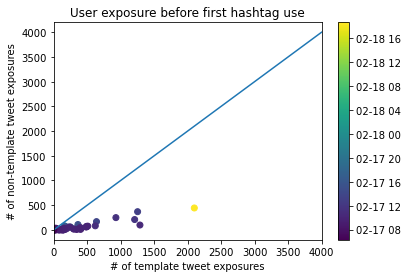

In [67]:
t = [mdates.date2num(d) for d in f_dates]

fig, ax = plt.subplots()
sc = ax.scatter(f_temps, f_norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

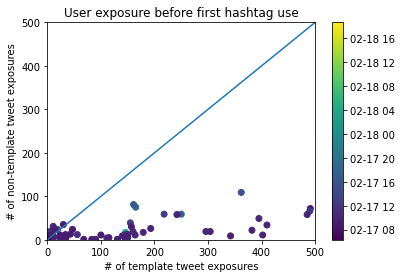

In [68]:
t = [mdates.date2num(d) for d in f_dates]

fig, ax = plt.subplots()
sc = ax.scatter(f_temps, f_norms, c=t)

loc = mdates.AutoDateLocator()
fig.colorbar(sc, ticks=loc,
                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 500])
plt.ylim([0, 500])

plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')

plt.show()

Text(0.5, 1.0, 'Total Exposures by Tweet Type')

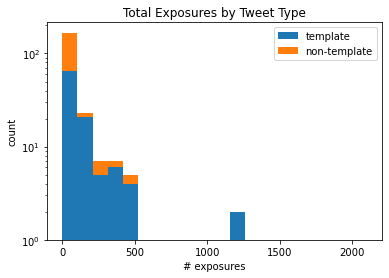

In [69]:
plt.hist([f_temps, f_norms], stacked=True, log=True, bins=20, label=['template', 'non-template'])
plt.legend()
plt.xlabel('# exposures')
plt.ylabel('count')
plt.title('Total Exposures by Tweet Type')

Text(0.5, 0, '# of template exposures')

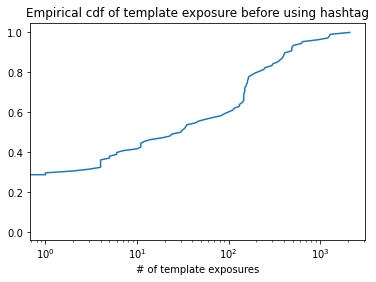

In [70]:
ecdf = ECDF(f_temps)
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of template exposure before using hashtag')
plt.xlabel('# of template exposures')

Text(0.5, 0, '# of non-template exposures')

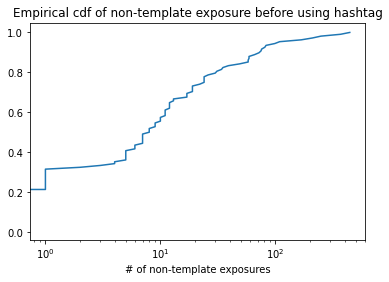

In [71]:
ecdf = ECDF(f_norms)
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of non-template exposure before using hashtag')
plt.xlabel('# of non-template exposures')

Text(0.5, 0, '# of exposures')

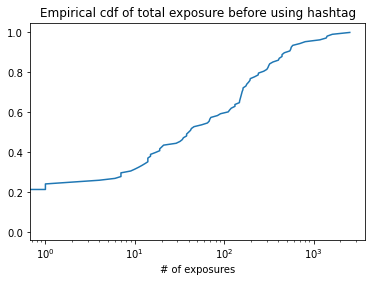

In [72]:
ecdf = ECDF([x+y for x,y in zip(f_temps,f_norms)])
plt.plot(ecdf.x, ecdf.y)
plt.xscale('log')
plt.title('Empirical cdf of total exposure before using hashtag')
plt.xlabel('# of exposures')

## Who are the second wave non-template tweeters?

In [73]:
sorted_tweets = sorted(tweets.values(), key=lambda x: x['date'])[::-1]
begin, end = datetime(2019,9,1), datetime(2019,9, 13) #month of september]
filtered_tweets = [t for t in tweets.values() if t['date'] >= begin and t['date'] <= end] 

In [74]:
user_df = preprocessing.load_user_data()
user_df.head()

templates  template_retweets  tweets  retweets  campaigns  \
4bhi9                0                  0       4        27          0   
advrayadav           0                  0       0        14          0   
deepsethi01         13                 40      23       195          4   
desh_bhkt            0                  0      24        33          0   
devendrapai          0                  0      12         7          0   

                             id                        location  \
4bhi9                       NaN                             NaN   
advrayadav             68160779   uttar pradesh & delhi , india   
deepsethi01  773812588228534272                  kota,rajasthan   
desh_bhkt            1465206535  dabru dabru dabru.hahahaha.com   
devendrapai            53862134                    amchi mumbai   

                                                   description followers  \
4bhi9                                                      NaN       NaN   
advrayadav   advocate supreme court of india, national pres...     11560   
deepsethi01  loksabha vice coordinator bjp .blessed to be f...      1680   
desh_bhkt    make fun of life before it starts making fun o...     23672   
devendrapai  course director at rmp's @iidlpgp. swayamsevak...      7398   

            friends statuses               type  \
4bhi9           NaN      NaN  6_non-participant   
advrayadav    12591    24663  6_non-participant   
deepsethi01     923    72646         2_official   
desh_bhkt       135   116912  6_non-participant   
devendrapai     990    45891  6_non-participant   

                                               new_description  \
4bhi9                                                     None   
advrayadav                                                None   
deepsethi01  Loksabha Vice Coordinator BJP .\n\nBlessed to ...   
desh_bhkt                                                 None   
devendrapai                                               None   

                                                          temp group  
4bhi9                                          non-participant     0  
advrayadav                                     non-participant     0  
deepsethi01   loksabha vice coordin bjp bless to be follow ...   3-5  
desh_bhkt                                      non-participant     0  
devendrapai                                    non-participant     0

In [75]:
import numpy as np

In [76]:
users = np.unique([t['username'] for t in filtered_tweets])
user_types = [user_df.type.get(u, 'Unknown') for u in users] 

In [77]:
import pandas as pd

In [78]:
counts = pd.Series(user_types).value_counts()
normed = [x/sum(counts) for x in counts]

['black', 'g', 'b', 'r', 'orange', 'pink']

Text(0.5, 1.0, 'User Breakdown of Second Wave Participants')

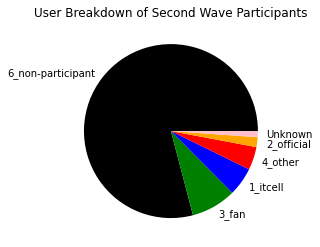

In [112]:
plt.pie(normed, labels=counts.index, colors=[color_map[x] for x in counts.index])
plt.title('User Breakdown of Second Wave Participants')

## Who are the first wave non-template tweeters?

In [131]:
sorted_tweets = sorted(tweets.values(), key=lambda x: x['date'])[::-1]
begin, end = datetime(2019,2,10), datetime(2019,2,20) #month of february
filtered_tweets = [t for t in tweets.values() if t['date'] >= begin and t['date'] <= end and t['template'] == ''] 

In [132]:
users = np.unique([t['username'] for t in filtered_tweets])
user_types = [user_df.type.get(u, 'Unknown') for u in users] 

In [133]:
import pandas as pd

In [134]:
counts = pd.Series(user_types).value_counts()
normed = [x/sum(counts) for x in counts]

Text(0.5, 1.0, 'User Breakdown of First Wave Participants')

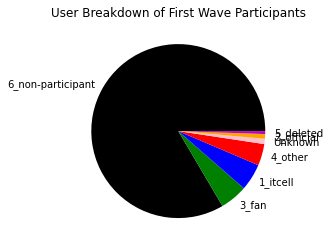

In [135]:
plt.pie(normed, labels=counts.index, colors=[color_map[x] for x in counts.index])
plt.title('User Breakdown of First Wave Participants')

## Plotting Breakdown Colored by User Type

In [104]:
color_map = {
    '1_itcell': 'b',
    '2_official': 'orange',
    '3_fan': 'g',
    '4_other': 'r',
    '5_deleted': 'm',
    '6_non-participant': 'black',
    'Unknown': 'pink'
}

In [105]:
results = {} #username -> (# template, # non-template)
sorted_tweets = sorted(tweets.values(), key=lambda x: x['date'])[::-1]
#sorted_tweets = [x for x in sorted_tweets if followers_dict[x['username']] is not None]
for i in tqdm(range(len(sorted_tweets))):
    child = sorted_tweets[i]
    n_temp, n_norm = 0, 0
    for j in range(i, len(sorted_tweets)):
        #print(sorted_tweets[j]['id'])
        followers = followers_dict[sorted_tweets[j]['username']]
        if followers is None:
            followers = set()
        if child['username'] in followers:
            if sorted_tweets[j]['template'] != '':
                n_temp += 1
            else:
                n_norm += 1
    results[child['username']] = (n_temp, n_norm, child['date'], child['username'])

100%|██████████| 13908/13908 [00:33<00:00, 419.77it/s] 


In [106]:
temps, norms, dates, usernames = zip(*list(results.values()))

In [107]:
begin, end = datetime(2019,9,1), datetime(2019,9, 13) #month of september
filtered_results = [(x,y,z, a) for x,y,z,a in zip(temps, norms, dates, usernames) if z > begin and z < end]
f_temps, f_norms, f_dates, f_usernames = zip(*filtered_results)

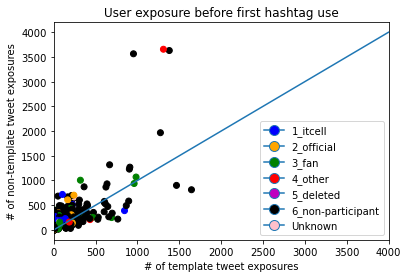

In [108]:
#t = [mdates.date2num(d) for d in f_dates]
cs = [color_map[user_df.type.get(u, 'Unknown')] for u in f_usernames] 
fig, ax = plt.subplots()
sc = ax.scatter(f_temps, f_norms, c=cs)

#loc = mdates.AutoDateLocator()
#fig.colorbar(sc, ticks=loc,
#                 format=mdates.AutoDateFormatter(loc))

plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 4000])
plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
legend_elems = [Line2D([0], [0], marker='o', label=key, markerfacecolor=value, markersize=10) for key,value in color_map.items()]

plt.legend(handles=legend_elems)
plt.show()

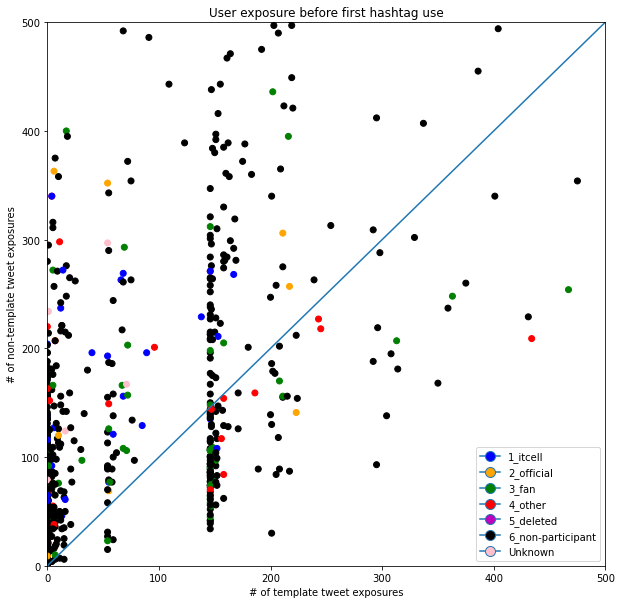

In [109]:
#t = [mdates.date2num(d) for d in f_dates]
cs = [color_map[user_df.type.get(u, 'Unknown')] for u in f_usernames] 
fig, ax = plt.subplots(figsize=(10,10))
sc = ax.scatter(f_temps, f_norms, c=cs)

#loc = mdates.AutoDateLocator()
#fig.colorbar(sc, ticks=loc,
#                 format=mdates.AutoDateFormatter(loc))


plt.title('User exposure before first hashtag use')
plt.xlabel('# of template tweet exposures')
plt.ylabel('# of non-template tweet exposures')
plt.xlim([0, 500])
plt.ylim([0, 500])

plt.plot([0,4000],[0,4000],'-')
# plt.xscale('log')
# plt.yscale('log')
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
legend_elems = [Line2D([0], [0], marker='o', label=key, markerfacecolor=value, markersize=10) for key,value in color_map.items()]

plt.legend(handles=legend_elems)
plt.show()